# Predicting the category of the Reddit post using Natural Language Processing

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras.utils import np_utils

Loading the dataset

In [89]:
df = pd.read_csv('reddit_posts.csv') 

Displaying the first few rows of the dataset

In [90]:
df.head() # Displays the first 5 rows of the dataset


,adserver_click_url,adserver_imp_pixel,archived,author,author_flair_css_class,author_flair_text,contest_mode,created_utc,disable_comments,distinguished,...,spoiler,stickied,subreddit,subreddit_id,third_party_tracking,third_party_tracking_2,thumbnail,title,ups,url
0,NaN,NaN,False,johnnyawesome0,NaN,NaN,False,1480697304,NaN,NaN,...,False,False,techsupport,t5_2qioo,NaN,NaN,self,Help with audio set-up,1.0,https://www.reddit.com/r/techsupport/comments/...
1,NaN,NaN,False,Silverfin113,NaN,NaN,False,1480697424,NaN,NaN,...,False,False,learnprogramming,t5_2r7yd,NaN,NaN,self,Optimizing code for speed,23.0,https://www.reddit.com/r/learnprogramming/comm...
2,NaN,NaN,False,bookbooksbooks,NaN,NaN,False,1480697613,NaN,NaN,...,False,False,gamedev,t5_2qi0a,NaN,NaN,self,Seeking Tales of Development Woe (and Triumph)...,12.0,https://www.reddit.com/r/gamedev/comments/5g4a...
3,NaN,NaN,False,[deleted],NaN,NaN,False,1480697634,NaN,NaN,...,False,False,learnprogramming,t5_2r7yd,NaN,NaN,default,[Java] Finding smallest value in an array,0.0,https://www.reddit.com/r/learnprogramming/comm...
4,NaN,NaN,False,caffeine_potent,NaN,NaN,False,1480697748,NaN,NaN,...,False,False,learnpython,t5_2r8ot,NaN,NaN,self,currying functions using functools,6.0,https://www.reddit.com/r/learnpython/comments/...


Displaying the number of rows and columns of the dataset

In [91]:
df.shape

(26688, 53)

Checking the null values

In [92]:
df.columns # Column names

Index(['adserver_click_url', 'adserver_imp_pixel', 'archived', 'author',
       'author_flair_css_class', 'author_flair_text', 'contest_mode',
       'created_utc', 'disable_comments', 'distinguished', 'domain', 'downs',
       'edited', 'gilded', 'hide_score', 'href_url', 'id', 'imp_pixel',
       'is_self', 'link_flair_css_class', 'link_flair_text', 'locked', 'media',
       'media_embed', 'mobile_ad_url', 'name', 'num_comments', 'original_link',
       'over_18', 'permalink', 'post_hint', 'preview', 'promoted',
       'promoted_by', 'promoted_display_name', 'promoted_url', 'quarantine',
       'retrieved_on', 'saved', 'score', 'secure_media', 'secure_media_embed',
       'selftext', 'spoiler', 'stickied', 'subreddit', 'subreddit_id',
       'third_party_tracking', 'third_party_tracking_2', 'thumbnail', 'title',
       'ups', 'url'],
      dtype='object')

In [93]:
# Information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26688 entries, 0 to 26687
Data columns (total 53 columns):
adserver_click_url        0 non-null float64
adserver_imp_pixel        0 non-null float64
archived                  26688 non-null bool
author                    26688 non-null object
author_flair_css_class    435 non-null object
author_flair_text         351 non-null object
contest_mode              26688 non-null bool
created_utc               26688 non-null int64
disable_comments          0 non-null float64
distinguished             85 non-null object
domain                    26688 non-null object
downs                     26688 non-null float64
edited                    26688 non-null object
gilded                    26688 non-null float64
hide_score                26688 non-null bool
href_url                  0 non-null float64
id                        26688 non-null object
imp_pixel                 0 non-null float64
is_self                   26688 non-null bool
link_fla

In [94]:
df.isnull().sum()

adserver_click_url        26688
adserver_imp_pixel        26688
archived                      0
author                        0
author_flair_css_class    26253
author_flair_text         26337
contest_mode                  0
created_utc                   0
disable_comments          26688
distinguished             26603
domain                        0
downs                         0
edited                        0
gilded                        0
hide_score                    0
href_url                  26688
id                            0
imp_pixel                 26688
is_self                       0
link_flair_css_class      22396
link_flair_text           22078
locked                        0
media                     26420
media_embed                   0
mobile_ad_url             26688
name                          0
num_comments                  0
original_link             26688
over_18                       0
permalink                     0
post_hint                 23175
preview 

In [95]:
df.drop(['adserver_click_url', 'adserver_imp_pixel', 
                'author_flair_css_class', 'author_flair_text','disable_comments','distinguished','href_url',
        'imp_pixel','link_flair_css_class','link_flair_text','media','mobile_ad_url','original_link',
        'post_hint','preview','promoted','promoted_by','promoted_display_name','promoted_url',
        'secure_media','third_party_tracking','third_party_tracking_2'], axis=1, inplace=True)

In [96]:
df.isnull().sum()

archived              0
author                0
contest_mode          0
created_utc           0
domain                0
downs                 0
edited                0
gilded                0
hide_score            0
id                    0
is_self               0
locked                0
media_embed           0
name                  0
num_comments          0
over_18               0
permalink             0
quarantine            0
retrieved_on          0
saved                 0
score                 0
secure_media_embed    0
selftext              0
spoiler               0
stickied              0
subreddit             0
subreddit_id          0
thumbnail             0
title                 0
ups                   0
url                   0
dtype: int64

In [97]:
#Number of entries in each category
df['subreddit'].value_counts() 

techsupport         11423
learnprogramming     3448
technology           2321
learnpython          1724
gamedev              1281
web_design            864
Python                603
javascript            546
linux                 545
javahelp              536
engineering           525
csshelp               393
iOSProgramming        330
swift                 261
programming           254
PHP                   192
computerscience       162
netsec                159
java                  157
compsci               154
django                127
css                   106
cpp                    86
HTML                   85
ruby                   77
flask                  71
html5                  62
jquery                 46
coding                 34
pygame                 34
perl                   24
lisp                   16
programmer             13
dailyprogrammer        10
IPython                 8
inventwithpython        6
pystats                 3
pythoncoding            2
Name: subred

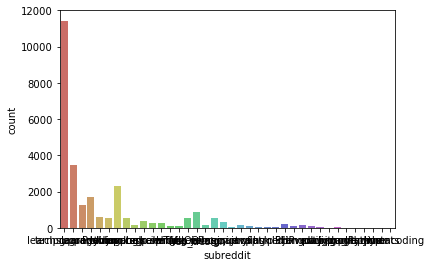

In [98]:
sns.countplot(x='subreddit',data=df, palette='hls')

### Mapping the Subreddit column to 1 if its Techsupport and 0 if its other than that

In [99]:
df['subreddit'] = df['subreddit'].map(lambda x: 1 if x == 'techsupport' else 0)

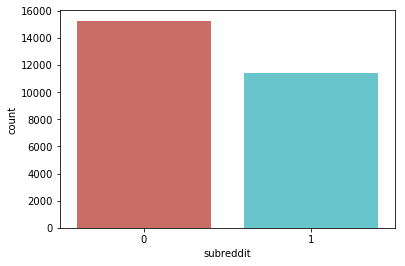

In [100]:
sns.countplot(x='subreddit',data=df, palette='hls') # Plotting the 'subreddit feature 

In [101]:
df.head() # Displays the first 5 rows of the dataset

,archived,author,contest_mode,created_utc,domain,downs,edited,gilded,hide_score,id,...,secure_media_embed,selftext,spoiler,stickied,subreddit,subreddit_id,thumbnail,title,ups,url
0,False,johnnyawesome0,False,1480697304,self.techsupport,0.0,False,0.0,False,5g49s2,...,{},I have a Sony surround sound system for a blu-...,False,False,1,t5_2qioo,self,Help with audio set-up,1.0,https://www.reddit.com/r/techsupport/comments/...
1,False,Silverfin113,False,1480697424,self.learnprogramming,0.0,False,0.0,False,5g4a5p,...,{},I've written what seems to be a prohibitively ...,False,False,0,t5_2r7yd,self,Optimizing code for speed,23.0,https://www.reddit.com/r/learnprogramming/comm...
2,False,bookbooksbooks,False,1480697613,self.gamedev,0.0,False,0.0,False,5g4att,...,{},"I'm writing an article called ""Video Games Tha...",False,False,0,t5_2qi0a,self,Seeking Tales of Development Woe (and Triumph)...,12.0,https://www.reddit.com/r/gamedev/comments/5g4a...
3,False,[deleted],False,1480697634,self.learnprogramming,0.0,1480698462,0.0,False,5g4awr,...,{},[deleted],False,False,0,t5_2r7yd,default,[Java] Finding smallest value in an array,0.0,https://www.reddit.com/r/learnprogramming/comm...
4,False,caffeine_potent,False,1480697748,self.learnpython,0.0,1480709138,0.0,False,5g4bcr,...,{},I have the following representation of argumen...,False,False,0,t5_2r8ot,self,currying functions using functools,6.0,https://www.reddit.com/r/learnpython/comments/...


In [102]:
df.columns

Index(['archived', 'author', 'contest_mode', 'created_utc', 'domain', 'downs',
       'edited', 'gilded', 'hide_score', 'id', 'is_self', 'locked',
       'media_embed', 'name', 'num_comments', 'over_18', 'permalink',
       'quarantine', 'retrieved_on', 'saved', 'score', 'secure_media_embed',
       'selftext', 'spoiler', 'stickied', 'subreddit', 'subreddit_id',
       'thumbnail', 'title', 'ups', 'url'],
      dtype='object')

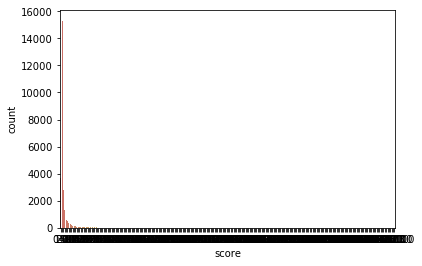

In [104]:
sns.countplot(x='score',data=df, palette='hls')

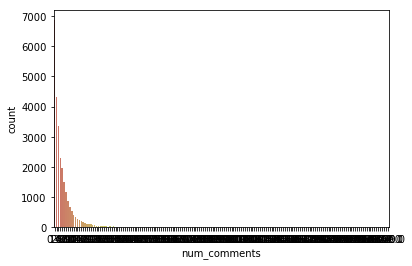

In [105]:
sns.countplot(x='num_comments',data=df, palette='hls')

In [109]:
df1 = df[['subreddit','title','url']] # Creating a new dataframe with fewer, relevant features

In [110]:
df1.head() # displaying the first 5 rows of the new dataset

,subreddit,title,url
0,1,Help with audio set-up,https://www.reddit.com/r/techsupport/comments/...
1,0,Optimizing code for speed,https://www.reddit.com/r/learnprogramming/comm...
2,0,Seeking Tales of Development Woe (and Triumph)...,https://www.reddit.com/r/gamedev/comments/5g4a...
3,0,[Java] Finding smallest value in an array,https://www.reddit.com/r/learnprogramming/comm...
4,0,currying functions using functools,https://www.reddit.com/r/learnpython/comments/...


### Defining a function to remove the punctuation of the colums in the dataset

In [111]:
def remove_punctuation(text):
    lower = text.lower()
    exclude = set(string.punctuation)
    return "".join(ch for ch in lower if ch not in exclude)

#### Applying the remove_punctuation() function to the Title column of the dataset

In [112]:
df1['processed_text'] = df1['title'].apply(remove_punctuation)

/Users/shilpi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [113]:
df1.head() #  Displays the dataset with the new column(processed_text) which has the punctuation removed

,subreddit,title,url,processed_text
0,1,Help with audio set-up,https://www.reddit.com/r/techsupport/comments/...,help with audio setup
1,0,Optimizing code for speed,https://www.reddit.com/r/learnprogramming/comm...,optimizing code for speed
2,0,Seeking Tales of Development Woe (and Triumph)...,https://www.reddit.com/r/gamedev/comments/5g4a...,seeking tales of development woe and triumph f...
3,0,[Java] Finding smallest value in an array,https://www.reddit.com/r/learnprogramming/comm...,java finding smallest value in an array
4,0,currying functions using functools,https://www.reddit.com/r/learnpython/comments/...,currying functions using functools


#### Defining the function remove_stopwords() which removes all the stopwords in the English language

In [114]:
def remove_stopwords(x):
    lower = x.lower()
    split = lower.split()
    final = ''
    for i in split:
        if i not in stopwords.words('english'):
            final += (i + " ")
    return final

#### Applying the remove_stopwords() function to the processed_text column of the dataset

In [115]:
df1['processed_text1'] = df1['processed_text'].apply(remove_stopwords)

/Users/shilpi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [116]:
df1.head()  #Displays the dataset with the new column(processed_text1) which has the stopwords removed

,subreddit,title,url,processed_text,processed_text1
0,1,Help with audio set-up,https://www.reddit.com/r/techsupport/comments/...,help with audio setup,help audio setup
1,0,Optimizing code for speed,https://www.reddit.com/r/learnprogramming/comm...,optimizing code for speed,optimizing code speed
2,0,Seeking Tales of Development Woe (and Triumph)...,https://www.reddit.com/r/gamedev/comments/5g4a...,seeking tales of development woe and triumph f...,seeking tales development woe triumph featured...
3,0,[Java] Finding smallest value in an array,https://www.reddit.com/r/learnprogramming/comm...,java finding smallest value in an array,java finding smallest value array
4,0,currying functions using functools,https://www.reddit.com/r/learnpython/comments/...,currying functions using functools,currying functions using functools


In [117]:
stemmer = PorterStemmer() # Initializing Porter Stemmer 

In [118]:
def split_and_stem(string):
    string = string.split(' ')
    temp = ""
    for i in string:
        temp += (stemmer.stem(i) + " ")
    return temp

In [119]:
df1['processed_text2'] = df1['processed_text1'].apply(split_and_stem)

/Users/shilpi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [120]:
df1.head()  #Displays the dataset with the new column(processed_text2) which has the root words

,subreddit,title,url,processed_text,processed_text1,processed_text2
0,1,Help with audio set-up,https://www.reddit.com/r/techsupport/comments/...,help with audio setup,help audio setup,help audio setup
1,0,Optimizing code for speed,https://www.reddit.com/r/learnprogramming/comm...,optimizing code for speed,optimizing code speed,optim code speed
2,0,Seeking Tales of Development Woe (and Triumph)...,https://www.reddit.com/r/gamedev/comments/5g4a...,seeking tales of development woe and triumph f...,seeking tales development woe triumph featured...,seek tale develop woe triumph featur articl
3,0,[Java] Finding smallest value in an array,https://www.reddit.com/r/learnprogramming/comm...,java finding smallest value in an array,java finding smallest value array,java find smallest valu array
4,0,currying functions using functools,https://www.reddit.com/r/learnpython/comments/...,currying functions using functools,currying functions using functools,curri function use functool


#### Assigning the X and y values to be worked upon

In [121]:
X = df1['processed_text2']
y = df1['subreddit'] # Target variable

#### Train Test Split

In [122]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

#### Count Vectorizer 

In [123]:
cvec = CountVectorizer()

In [124]:
df_train  = pd.DataFrame(cvec.fit_transform(X_train).todense(),
             columns=cvec.get_feature_names())

In [125]:
df_train.head()

,00,000,000nan,001,01,0111,0123,02,02610,03,...,کداک,کپی,જર,𝓘𝓰𝓷𝓸𝓻𝓮,𝓲𝓼,𝓲𝓽,𝓸𝓷𝓵𝔂,𝓹𝓵𝓮𝓪𝓼𝓮,𝓽𝓮𝓼𝓽,𝓽𝓱𝓲𝓼
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
df_test = pd.DataFrame(cvec.transform(X_test).todense(),
             columns=cvec.get_feature_names())

In [127]:
df_test.head()

,00,000,000nan,001,01,0111,0123,02,02610,03,...,کداک,کپی,જર,𝓘𝓰𝓷𝓸𝓻𝓮,𝓲𝓼,𝓲𝓽,𝓸𝓷𝓵𝔂,𝓹𝓵𝓮𝓪𝓼𝓮,𝓽𝓮𝓼𝓽,𝓽𝓱𝓲𝓼
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Random Forest Classifier

In [128]:
rfc = RandomForestClassifier()

In [129]:
rfc.fit(df_train, y_train)
print(rfc.score(df_train, y_train))
print(rfc.score(df_test,y_test))
print(confusion_matrix(y_train, rfc.predict(df_train)))
print(classification_report(y_train, rfc.predict(df_train)))


0.990212527964
0.875908265213
[[10194    42]
 [  133  7511]]
             precision    recall  f1-score   support

          0       0.99      1.00      0.99     10236
          1       0.99      0.98      0.99      7644

avg / total       0.99      0.99      0.99     17880



In [130]:
df_test.shape

(8808, 12243)

In [131]:
rfc.score(df_train, y_train)

0.99021252796420578

In [132]:
rfc.score(df_test, y_test)

0.87590826521344234

In [133]:
def run_model(x_train, y_train, x_test, y_test, rfc):
    rfc.fit(x_train, y_train)
    print("Base model score: " , str(np.mean(y_test))[:6])
    print("Training set score: ", str(rfc.score(x_train, y_train))[:6])
    print ("Test set score: ", str(rfc.score(x_test, y_test))[:6])
    predictions = rfc.predict(x_test)
    print ("\nConfusion Matrix:\n", pd.DataFrame(confusion_matrix(y_test, predictions), 
                                              columns=['predicted_0', 'predicted_1'], index=['is_0', 'is_1']))
    print ("\nClassification Report:\n",classification_report(y_test, predictions))

In [134]:
run_model(df_train,y_train,df_test,y_test,rfc)

Base model score:  0.4290
Training set score:  0.9900
Test set score:  0.8806

Confusion Matrix:
       predicted_0  predicted_1
is_0         4591          438
is_1          613         3166

Classification Report:
              precision    recall  f1-score   support

          0       0.88      0.91      0.90      5029
          1       0.88      0.84      0.86      3779

avg / total       0.88      0.88      0.88      8808



In [135]:
rfc_y_score = rfc.predict_proba(df_test)[:,1]

In [136]:
print(roc_auc_score(y_test, rfc_y_score))

0.935880519607


In [137]:
rfc_FPR = dict()
rfc_TPR = dict()
rfc_ROC_AUC = dict()

In [138]:
roc_curve(y_test, rfc_y_score)

(array([ 0.        ,  0.00994233,  0.00994233,  0.00994233,  0.00994233,
         0.01014118,  0.01014118,  0.02366276,  0.02366276,  0.02366276,
         0.02366276,  0.02366276,  0.02366276,  0.02366276,  0.02366276,
         0.02366276,  0.0387751 ,  0.0387751 ,  0.0387751 ,  0.0387751 ,
         0.03897395,  0.0391728 ,  0.0391728 ,  0.03937164,  0.03957049,
         0.03976934,  0.03976934,  0.04016703,  0.06184132,  0.06184132,
         0.06184132,  0.06223901,  0.06283555,  0.06283555,  0.0630344 ,
         0.0630344 ,  0.06323325,  0.08570292,  0.08590177,  0.08590177,
         0.08629946,  0.08629946,  0.08649831,  0.08649831,  0.08649831,
         0.08669716,  0.08669716,  0.08669716,  0.086896  ,  0.08709485,
         0.11871147,  0.11871147,  0.11910917,  0.11910917,  0.11930801,
         0.11970571,  0.11990455,  0.12030225,  0.12030225,  0.12050109,
         0.12089879,  0.12189302,  0.12189302,  0.12209187,  0.12229071,
         0.12268841,  0.12288725,  0.1230861 ,  0.1

In [139]:
rfc_FPR[1], rfc_TPR[1], _ = roc_curve(y_test, rfc_y_score)
rfc_ROC_AUC[1] = auc(rfc_FPR[1], rfc_TPR[1])

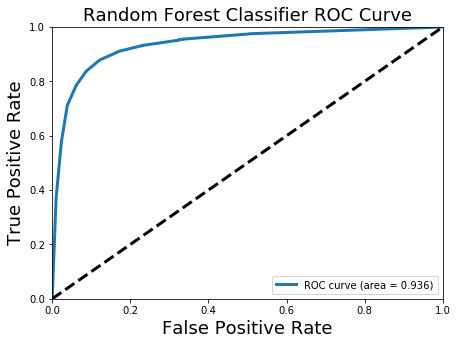

In [140]:
plt.figure(figsize=[7,5])
plt.plot(rfc_FPR[1], rfc_TPR[1], label='ROC curve (area = %0.3f)' % rfc_ROC_AUC[1], linewidth=3)
plt.plot([0, 1], [0, 1], 'k--', linewidth=3)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Random Forest Classifier ROC Curve', fontsize=18)
plt.legend(loc="lower right")
plt.show()

# Linear SVC

In [141]:
linearsvc = LinearSVC()
linearsvc.fit(df_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [142]:
linearsvc.score(df_train, y_train)
linearsvc.score(df_test, y_test)

0.90304268846503177

In [143]:
run_model(df_train, y_train, df_test, y_test, linearsvc)

Base model score:  0.4290
Training set score:  0.9843
Test set score:  0.9030

Confusion Matrix:
       predicted_0  predicted_1
is_0         4619          410
is_1          444         3335

Classification Report:
              precision    recall  f1-score   support

          0       0.91      0.92      0.92      5029
          1       0.89      0.88      0.89      3779

avg / total       0.90      0.90      0.90      8808



# Using Neural Network  

In [33]:
df_train = df_train.values
df_test = df_test.values


In [34]:
model = Sequential()
model.add(Dense(df_train.shape[1], input_dim=df_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',metrics= ['accuracy'])

In [35]:
model.fit(df_train,y_train, validation_data=(df_test,y_test),epochs=10)

Train on 17880 samples, validate on 8808 samples
Epoch 1/10
  704/17880 [>.............................] - ETA: 1:30:04 - loss: 0.5254 - acc: 0.7940

KeyboardInterrupt: 

#### Had to interrupt the kernel due to the execution time it was taking for a single epoch to execute when I had to execute 10 epochs